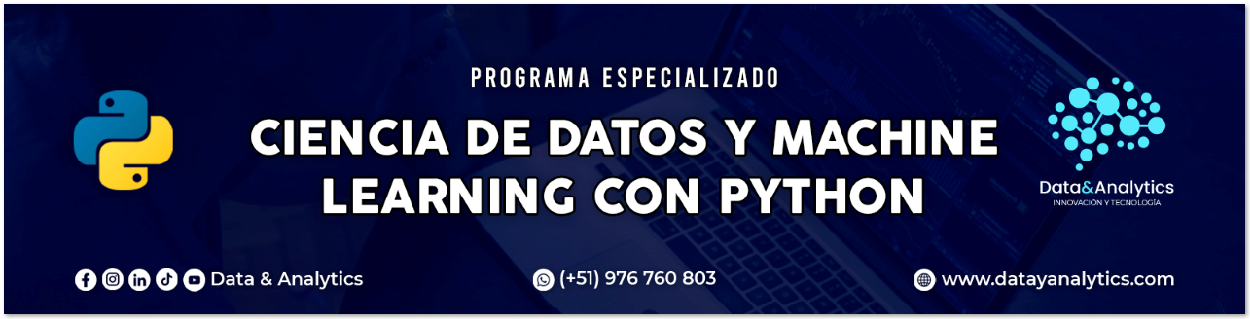

#DATA & ANALYTICS



----------------------------
**Algoritmos de Machine Learning para Clasificación**  
(Mantenimiento Predictivo para máquinas)

Instructor: Angelo Jonathan  Diaz Soto

E-mail: angelo.diaz@imca.edu.pe

Web: www.datayanalytics.com

# Descripción de los datos

El dataset escogido presenta un conjunto de datos sinteticos que reflejan el mantenimiento predictivo real encontrado en la industria.

Está compuesto por 10 columnas, las cuales se detallarán a continuación:

- **UDI:** Identificador de la máquina. Es un valor único para cada una.

- **Product ID:** Indica la calidad del producto. Posee una letra L (baja - 50% de todos los productos), M (Media - 30%) y H (Alta - 20%). Además tiene un numero de serie especifico de la variante de calidad del producto.

- **Type:** Tipo del producto. Los valores son una letra L, M y H, de acuerdo con la descripción mencionada en la columna anterior Product ID.

- **Air Temperature [K]:** Corresponde a la temperatura del Aire medida en Grados Kelvin.

- **Process Temperature [K]:** Corresponde a la temperatura del proceso medida en Grados Kelvin.

- **Rotational speed [rpm]:** Velocidad de rotación de la máquina medida en revoluciones por minuto.

- **Torque [Nm]:** Torque medido en Newton metros. Sus datos están distribuidos normalmente alrededor de los 40 Nm y sin valores negativos.

- **Tool wear [min]:** Desgaste de la herramienta. Las variantes de calidad H/M/L añaden 5/3/2 minutos de desgaste de la herramienta usada en el proceso.

- **Target:** Etiqueta que indica si la maquina falla o no. Sus valores son 0 o 1 donde 0 indica que la maquina no fallado y 1 que la máquina si ha fallado.

- **Failure Type:** Indica el tipo de falla. Estás pueden ser: No Failure (Sin fallo), Heat Dissipation Failure (Falla por disipación de calor), Power Failure (Falla de alimentación), Overstrain Failure (Falla por Sobrefuerza), Tool Wear Failure (Falla por desgaste de la herramienta) y Random Failures (Fallas aleatorias).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importando las librerias

In [ ]:
# Importamos las librerias a utilizar
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

# Librerías de Sklearn.
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score

# Cargando el Dataset

In [ ]:
df=pd.read_csv("/content/drive/My Drive/Mydrive/Data/Data_modulo6/predictive_maintenance.csv")
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [ ]:
#Información de la data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


# Limpieza de datos

Notamos que tenemos varias variables como objet: Type, Failure Type para python se trabaja con datos entero, flotantes, por ello debemos modificar el tipo de información para que sea fácil de trabajar. Ademas se tiene que la columna de Product ID, es unica para cada producto, es por ello que no se puede normalizar a un solo valor ya que se compone de letras y numeros.

Las variables de tipo object (Type y Failure Type) se convierten de alfanuméricas a numéricas con el comando **LabelEncoder().fit_transform()** y nuevamente se muestra la información de la data para visualizar que todas las variables son de tipo numérico.

In [ ]:
#Cambiamos de tipo object a  numérico
from sklearn.preprocessing import LabelEncoder
df['Type'] = LabelEncoder().fit_transform(df['Type'])
df['Failure Type'] = LabelEncoder().fit_transform(df['Failure Type'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  int64  
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 781.4+ KB


In [ ]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,2,298.1,308.6,1551,42.8,0,0,1
1,2,L47181,1,298.2,308.7,1408,46.3,3,0,1
2,3,L47182,1,298.1,308.5,1498,49.4,5,0,1
3,4,L47183,1,298.2,308.6,1433,39.5,7,0,1
4,5,L47184,1,298.2,308.7,1408,40.0,9,0,1


# Análisis Exploratorio

In [ ]:
#Cantidad de valores perdidos
df.isna().sum()

,0
UDI,0
Product ID,0
Type,0
Air temperature [K],0
Process temperature [K],0
Rotational speed [rpm],0
Torque [Nm],0
Tool wear [min],0
Target,0
Failure Type,0


In [ ]:
#Conteo de casos del target
df['Target'].value_counts()

,count
Target,
0,9661
1,339


In [ ]:
#Tipo del producto: L = 1, M = 2, H = 0
df['Type'].value_counts()

,count
Type,
1,6000
2,2997
0,1003


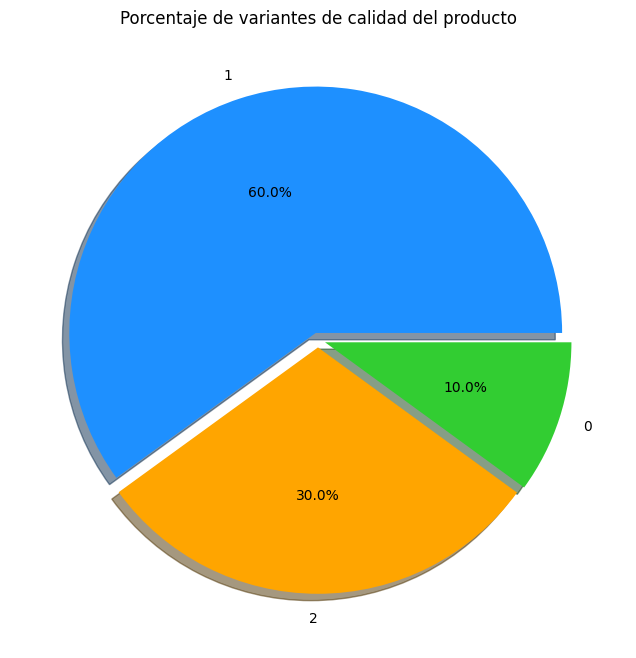

In [ ]:
#Gráfico de pastel
plt.figure(figsize = (8,8))
df['Type'].value_counts().plot.pie(explode = [0.03, 0.03, 0.03], colors = ['dodgerblue', 'orange', 'limegreen'], autopct = '%1.1f%%', shadow = True)
plt.xlabel(''),plt.ylabel('')
plt.title('Porcentaje de variantes de calidad del producto')
plt.show()

In [ ]:
#Eliminar la variable "ProductID"
df = df[['UDI', 'Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target', 'Failure Type']]
df.head()

,UDI,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,2,298.1,308.6,1551,42.8,0,0,1
1,2,1,298.2,308.7,1408,46.3,3,0,1
2,3,1,298.1,308.5,1498,49.4,5,0,1
3,4,1,298.2,308.6,1433,39.5,7,0,1
4,5,1,298.2,308.7,1408,40.0,9,0,1


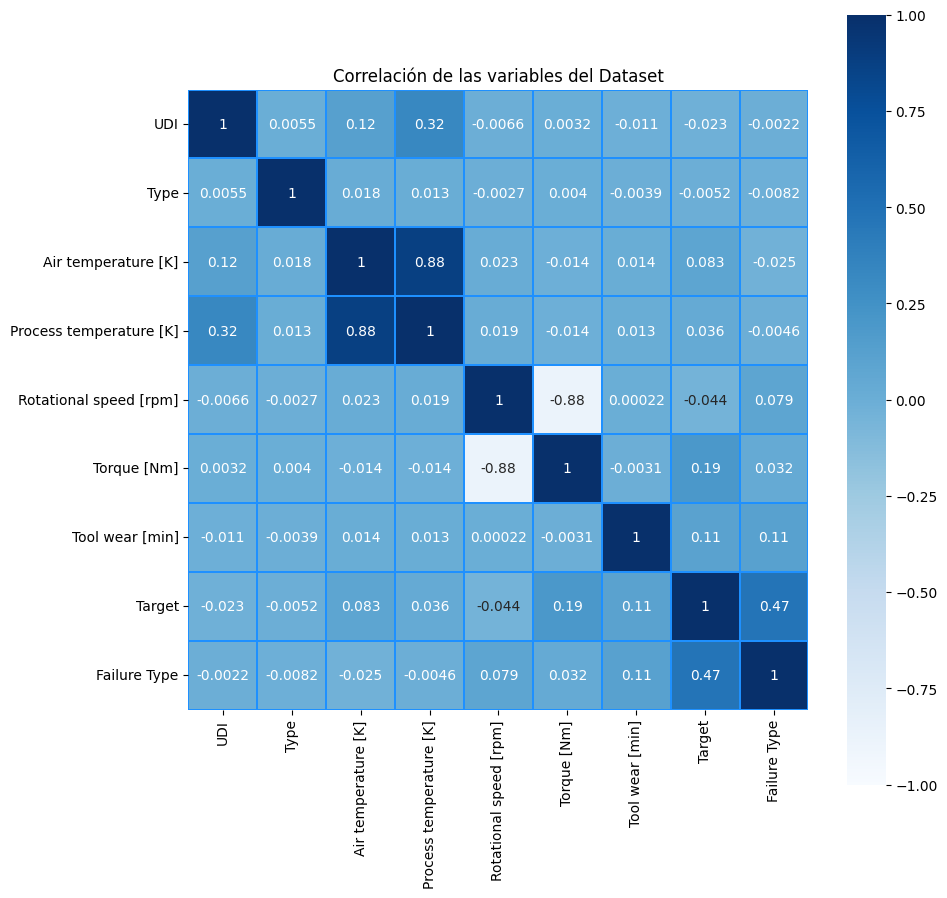

In [ ]:
#Análisis de correlación
plt.figure(figsize=(10,10))
Correlacion = df.corr()
sns.heatmap(Correlacion, cmap = 'Blues', linewidths = 0.3, linecolor = 'dodgerblue', annot = True,
            vmin = -1, vmax = 1, cbar_kws = {'orientation':'vertical'}, square = True, cbar = True)
plt.title('Correlación de las variables del Dataset')
plt.show()

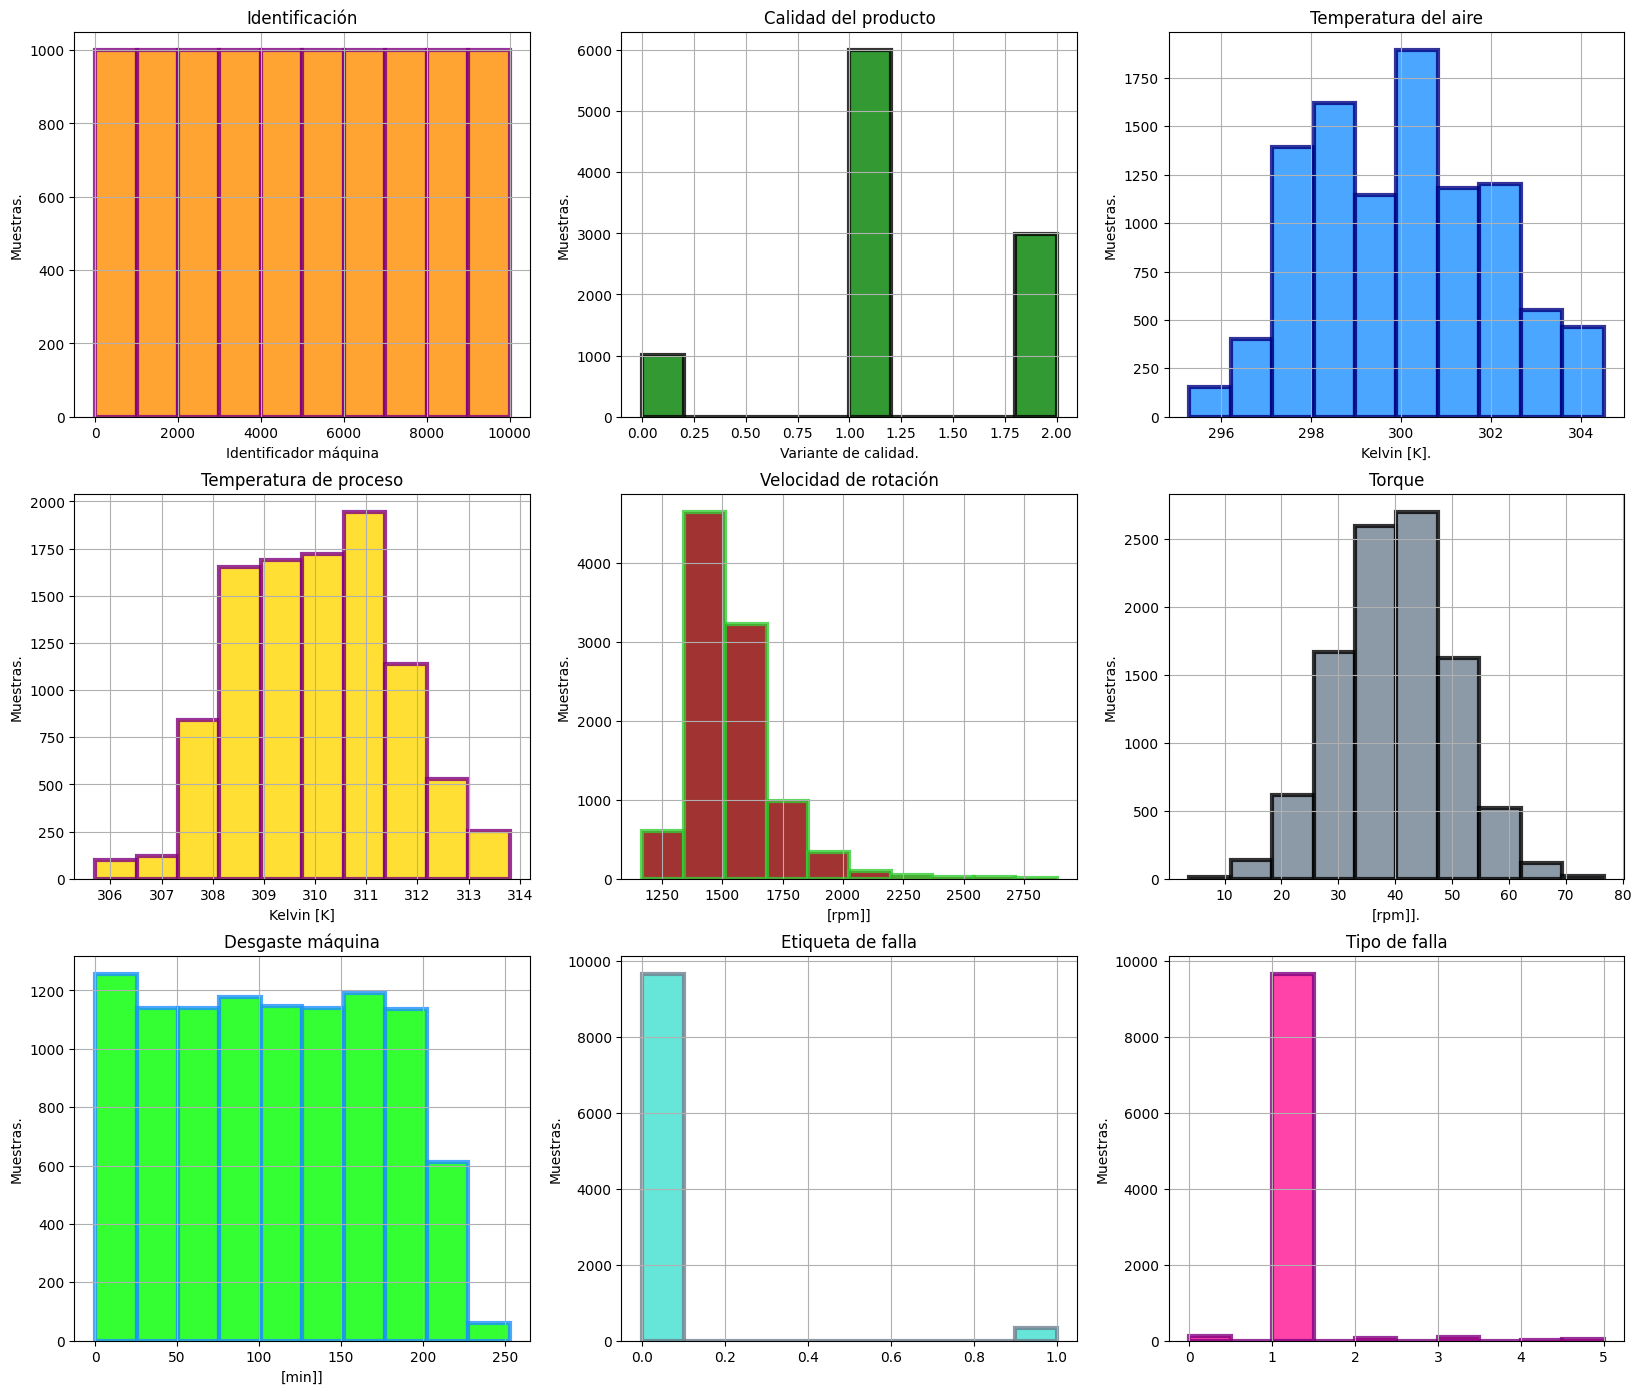

In [ ]:
#Histogramas de cada variable
plt.figure(figsize=(20,17))

plt.subplot(331)
plt.hist(df["UDI"], color = "darkorange", edgecolor = 'purple', alpha = 0.8, linewidth = 3)
plt.title('Identificación'), plt.xlabel('Identificador máquina'), plt.ylabel('Muestras.'), plt.grid()

plt.subplot(332)
plt.hist(df["Type"], color = "green", edgecolor = 'black', alpha = 0.8, linewidth = 3)
plt.title('Calidad del producto'), plt.xlabel('Variante de calidad.'), plt.ylabel('Muestras.'), plt.grid()

plt.subplot(333)
plt.hist(df["Air temperature [K]"], color = "dodgerblue", edgecolor = 'navy', alpha = 0.8, linewidth = 3)
plt.title('Temperatura del aire'), plt.xlabel('Kelvin [K].'), plt.ylabel('Muestras.'), plt.grid()

plt.subplot(334)
plt.hist(df["Process temperature [K]"], color = "gold", edgecolor = 'purple', alpha = 0.8, linewidth = 3)
plt.title('Temperatura de proceso'), plt.xlabel('Kelvin [K]'), plt.ylabel('Muestras.'), plt.grid()

plt.subplot(335)
plt.hist(df["Rotational speed [rpm]"], color = "darkred", edgecolor = 'limegreen', alpha = 0.8, linewidth = 3)
plt.title('Velocidad de rotación'), plt.xlabel('[rpm]]'), plt.ylabel('Muestras.'), plt.grid()

plt.subplot(336)
plt.hist(df["Torque [Nm]"], color = "slategrey", edgecolor = 'black', alpha = 0.8, linewidth = 3)
plt.title('Torque'), plt.xlabel('[rpm]].'), plt.ylabel('Muestras.'), plt.grid()

plt.subplot(337)
plt.hist(df["Tool wear [min]"], color = "lime", edgecolor = 'dodgerblue', alpha = 0.8, linewidth = 3)
plt.title('Desgaste máquina'), plt.xlabel('[min]]'), plt.ylabel('Muestras.'), plt.grid()

plt.subplot(338)
plt.hist(df["Target"], color = "turquoise", edgecolor = 'slategray', alpha = 0.8, linewidth = 3)
plt.title('Etiqueta de falla'), plt.xlabel(''), plt.ylabel('Muestras.'), plt.grid()

plt.subplot(339)
plt.hist(df["Failure Type"], color = "deeppink", edgecolor = 'purple', alpha = 0.8, linewidth = 3)
plt.title('Tipo de falla'), plt.xlabel(''), plt.ylabel('Muestras.'), plt.grid()

plt.show()


<ipython-input-17-c1c53b305c0d>:6: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(y = df["UDI"], jitter = False, color = "yellow", edgecolor = 'gray')
<ipython-input-17-c1c53b305c0d>:11: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(y = df["Type"], jitter = False, color = "yellow", edgecolor = 'gray')
<ipython-input-17-c1c53b305c0d>:16: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(y = df["Air temperature [K]"], jitter = False, color = "yellow", edgecolor = 'gray')
<ipython-input-17-c1c53b305c0d>:21: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(y = df["Process temperature [K]"], jitter = False, color = "yellow", edgecolo

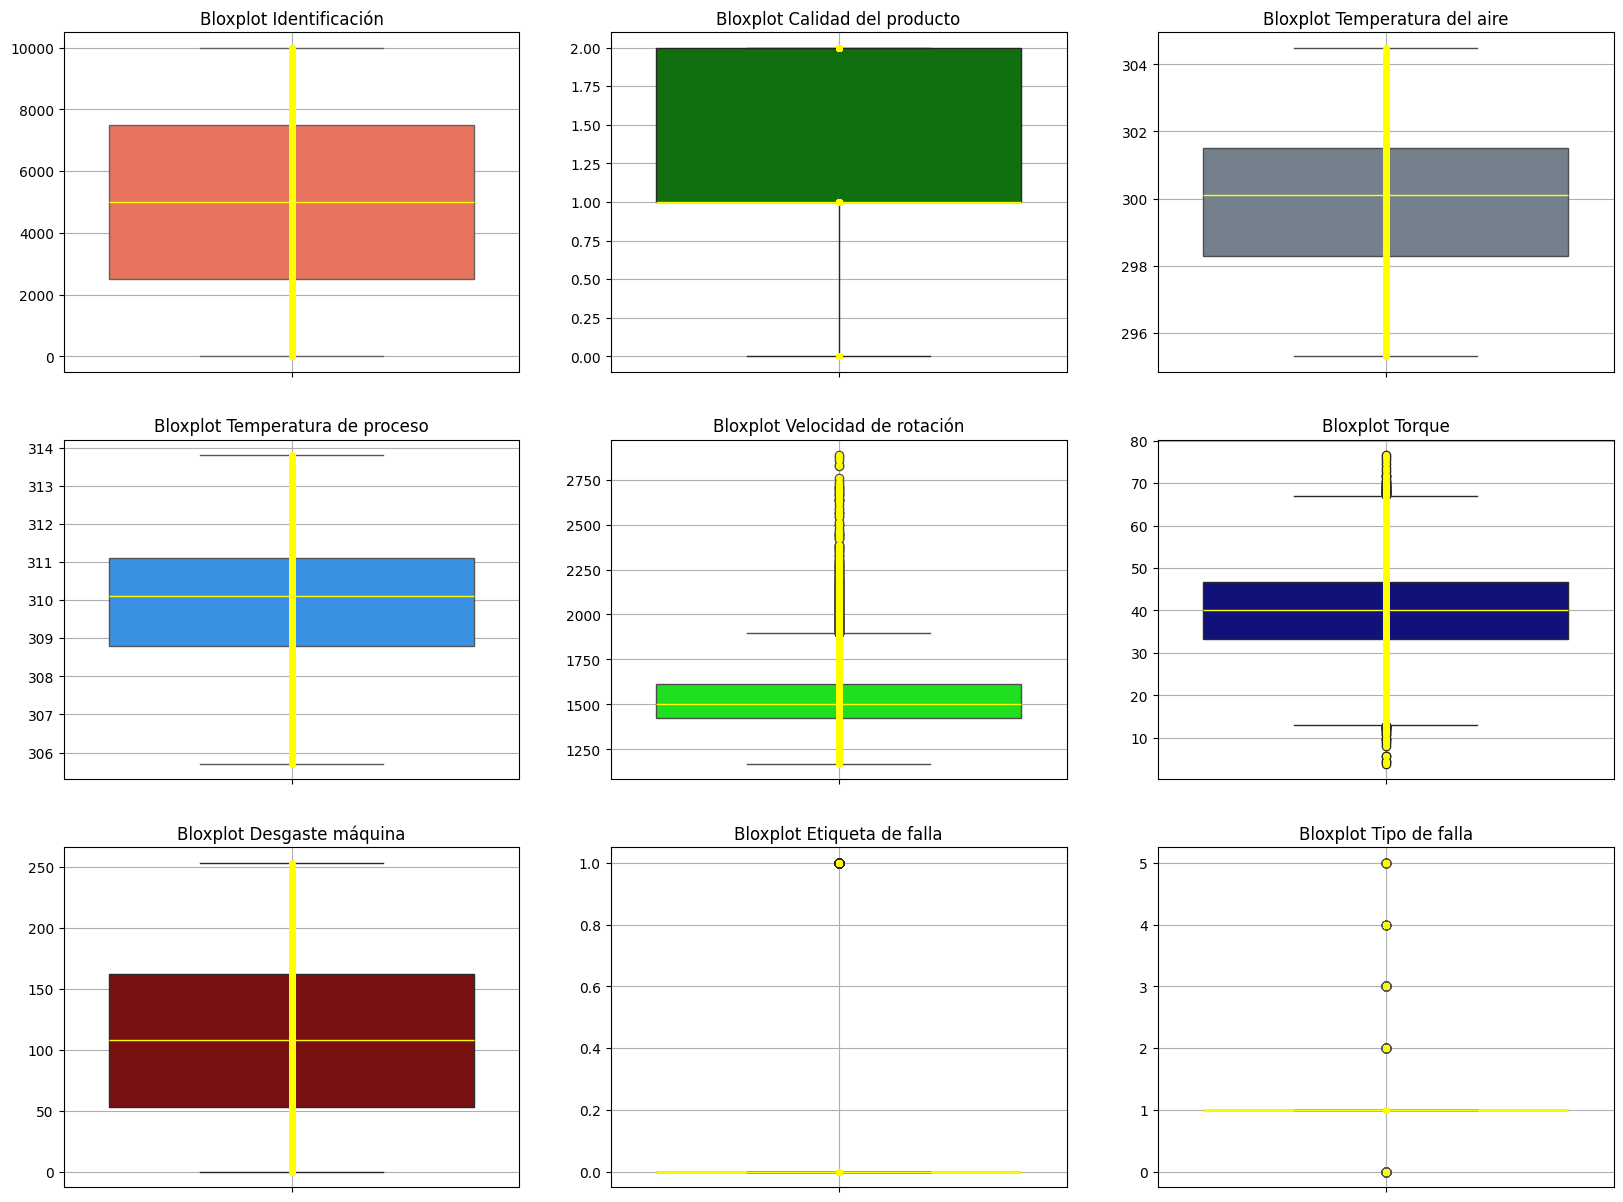

In [ ]:
#Boxplots para identificar valores atípicos

plt.figure(figsize=(20,15))

plt.subplot(331), sns.boxplot(y = df["UDI"], color = 'tomato', medianprops = dict(color = "yellow"))
sns.stripplot(y = df["UDI"], jitter = False, color = "yellow", edgecolor = 'gray')
plt.title('Bloxplot Identificación'), plt.ylabel('')
plt.grid()

plt.subplot(332), sns.boxplot(y = df["Type"], color = 'green', medianprops = dict(color = "yellow"))
sns.stripplot(y = df["Type"], jitter = False, color = "yellow", edgecolor = 'gray')
plt.title('Bloxplot Calidad del producto'), plt.ylabel('')
plt.grid()

plt.subplot(333), sns.boxplot(y=df["Air temperature [K]"], color = 'slategrey', medianprops = dict(color = "yellow"))
sns.stripplot(y = df["Air temperature [K]"], jitter = False, color = "yellow", edgecolor = 'gray')
plt.title('Bloxplot Temperatura del aire'), plt.ylabel('')
plt.grid()

plt.subplot(334), sns.boxplot(y=df["Process temperature [K]"], color = 'dodgerblue', medianprops = dict(color = "yellow"))
sns.stripplot(y = df["Process temperature [K]"], jitter = False, color = "yellow", edgecolor = 'gray')
plt.title('Bloxplot Temperatura de proceso'), plt.ylabel('')
plt.grid()

plt.subplot(335), sns.boxplot(y=df["Rotational speed [rpm]"], color = 'lime', medianprops = dict(color = "yellow"))
sns.stripplot(y = df["Rotational speed [rpm]"], jitter = False, color = "yellow", edgecolor = 'gray')
plt.title('Bloxplot Velocidad de rotación'), plt.ylabel('')
plt.grid()

plt.subplot(336), sns.boxplot(y=df["Torque [Nm]"], color = 'darkblue', medianprops = dict(color = "yellow"))
sns.stripplot(y = df["Torque [Nm]"], jitter = False, color = "yellow", edgecolor = 'gray')
plt.title('Bloxplot Torque'), plt.ylabel('')
plt.grid()

plt.subplot(337), sns.boxplot(y=df["Tool wear [min]"], color = 'darkred', medianprops = dict(color = "yellow"))
sns.stripplot(y = df["Tool wear [min]"], jitter = False, color = "yellow", edgecolor = 'gray')
plt.title('Bloxplot Desgaste máquina'), plt.ylabel('')
plt.grid()

plt.subplot(338), sns.boxplot(y=df["Target"], color = 'darkmagenta', medianprops = dict(color = "yellow"));
sns.stripplot(y = df["Target"], jitter = False, color = "yellow", edgecolor = 'gray')
plt.title('Bloxplot Etiqueta de falla'), plt.ylabel('')
plt.grid()

plt.subplot(339), sns.boxplot(y=df["Failure Type"], color = 'turquoise', medianprops = dict(color = "yellow"));
sns.stripplot(y = df["Failure Type"], jitter = False, color = "yellow", edgecolor = 'gray')
plt.title('Bloxplot Tipo de falla'), plt.ylabel('')
plt.grid()

plt.show()

# Implementación de algoritmos

## SVM (Maquina de Soporte Vectorial)

In [ ]:
#Identificando la variables independente y el target
X = df.drop(['Target','Failure Type'], axis=1)
Y = df['Target'].values

In [ ]:
#Segmentación del dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8)

In [ ]:
#Transformación de datos
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#Entrenado el SVC

from sklearn import svm

# Llamamos al objeto
svm_clf = svm.SVC()

# Entrenamos al modelo
classifier = svm_clf.fit(X_train, Y_train)

# Haciendo predicciones con el conjunto de prueba
y_pred_svm = classifier.predict(X_test)

In [ ]:
#Accuracy
from sklearn.metrics import confusion_matrix, classification_report
clf =print(classification_report(Y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1933
           1       0.75      0.04      0.08        67

    accuracy                           0.97      2000
   macro avg       0.86      0.52      0.53      2000
weighted avg       0.96      0.97      0.95      2000



In [ ]:
#Matriz de Confusión
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
acc_svm=accuracy_score(Y_test,y_pred_svm)
print(f"Accuracy Score de SVM es : {acc_svm}")


Accuracy Score de SVM es : 0.9675


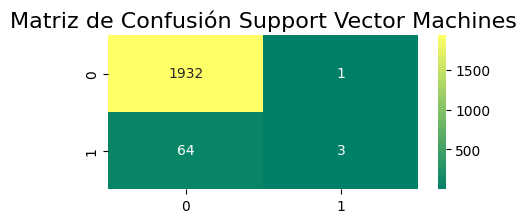

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

plt.figure(figsize = (5,2))
plt.title("Matriz de Confusión Support Vector Machines", fontsize=16)
sns.heatmap(confusion_matrix(Y_test, y_pred_svm), annot = True, cmap ='summer',fmt = '.0f')

plt.show();

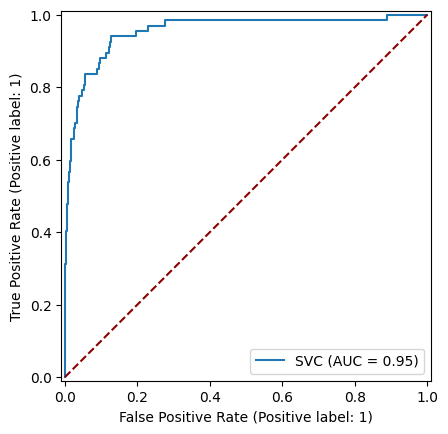

In [ ]:
#Curva ROC
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(svm_clf, X_test, Y_test )
plt.plot([0,1],[0,1],color='darkred',linestyle='--')
plt.show()


## Clasificador Random Forest

In [ ]:
#Entrenado el modelo

from sklearn.ensemble import RandomForestClassifier

# Llamando al objeto clasificador
rfc=RandomForestClassifier(random_state=42, n_estimators=500, n_jobs=-1)

# Entrenamiento del modelo
rfc.fit(X_train,Y_train)

# Haciendo predicciones
y_pred_rf=rfc.predict(X_test)

In [ ]:
#Accuracy
clf =print(classification_report(Y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1933
           1       0.85      0.51      0.64        67

    accuracy                           0.98      2000
   macro avg       0.92      0.75      0.81      2000
weighted avg       0.98      0.98      0.98      2000



In [ ]:
#Matriz de confusión
acc_rfc= accuracy_score(Y_test,y_pred_rf)
print(f"Accuracy Score de Random Forest es : {acc_rfc}")

Accuracy Score de Random Forest es : 0.9805


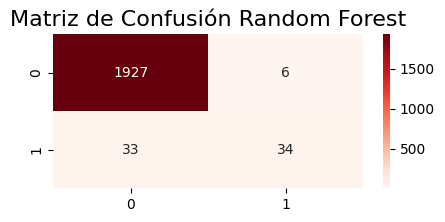

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

plt.figure(figsize = (5,2))
plt.title("Matriz de Confusión Random Forest", fontsize=16)
sns.heatmap(confusion_matrix(Y_test, y_pred_rf), annot = True, cmap ='Reds',fmt = '.0f')

plt.show();

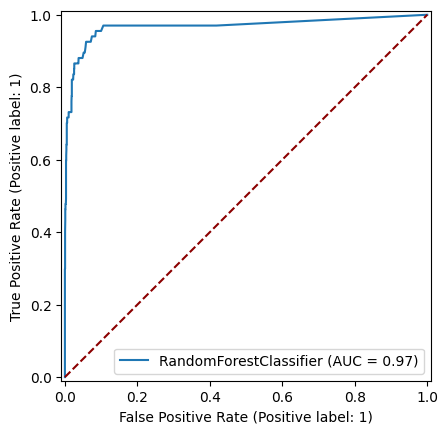

In [ ]:
#Curva ROC
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(rfc , X_test, Y_test )
plt.plot([0,1],[0,1],color='darkred',linestyle='--')
plt.show()

## Regresión logística binaria

In [ ]:
from sklearn.linear_model import LogisticRegression

# Llamamos al objeto
reg = LogisticRegression()

# Entrenamos al modelos
reg.fit(X_train,Y_train)

# Haciendo predicciones
y_pred_reg=reg.predict(X_test)

In [ ]:
#Métricas de validación
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report

acc_reg = accuracy_score(Y_test, y_pred_reg)
print("Classificación de Reporte:\n",classification_report(Y_test,y_pred_reg))

Classificación de Reporte:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1933
           1       1.00      0.01      0.03        67

    accuracy                           0.97      2000
   macro avg       0.98      0.51      0.51      2000
weighted avg       0.97      0.97      0.95      2000



In [ ]:
#Accuracy
acc_reg = accuracy_score(Y_test, y_pred_reg)
print(f"Accuracy Score de la Regresión logística : {acc_reg}")

Accuracy Score de la Regresión logística : 0.967


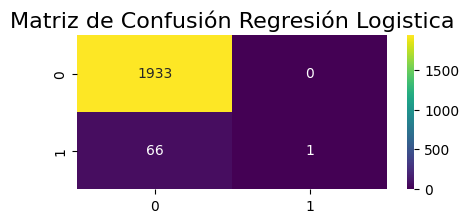

In [ ]:
#Matriz de confusión
from sklearn.metrics import confusion_matrix, classification_report

plt.figure(figsize = (5,2))
plt.title("Matriz de Confusión Regresión Logistica", fontsize=16)
sns.heatmap(confusion_matrix(Y_test,y_pred_reg), annot = True, cmap = 'viridis',fmt = '.0f')

plt.show();

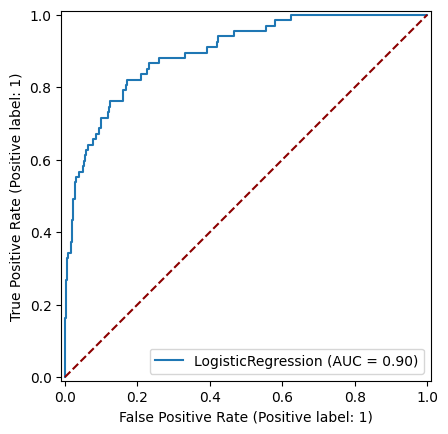

In [ ]:
#Curva ROC
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(reg , X_test, Y_test )
plt.plot([0,1],[0,1],color='darkred',linestyle='--')
plt.show()

## Árbol de Decisión

In [ ]:
#Implementando el modelo
from sklearn.tree import DecisionTreeClassifier

# Llamamos al objeto clasificador
dtree = DecisionTreeClassifier(max_depth=4, random_state=123, criterion='entropy')

# Entrenamos el modelo
dtree.fit(X_train,Y_train)

# Hacemos predicciones
y_pred_dt=dtree.predict(X_test)

In [ ]:
from sklearn.tree import export_text
tree_rules = export_text(dtree, feature_names=list(X.columns))
print(tree_rules)

|--- Rotational speed [rpm] <= 0.12
|   |--- Air temperature [K] <= 0.68
|   |   |--- Torque [Nm] <= 0.84
|   |   |   |--- Tool wear [min] <= 0.73
|   |   |   |   |--- class: 0
|   |   |   |--- Tool wear [min] >  0.73
|   |   |   |   |--- class: 0
|   |   |--- Torque [Nm] >  0.84
|   |   |   |--- Torque [Nm] <= 0.87
|   |   |   |   |--- class: 1
|   |   |   |--- Torque [Nm] >  0.87
|   |   |   |   |--- class: 1
|   |--- Air temperature [K] >  0.68
|   |   |--- UDI <= 0.49
|   |   |   |--- UDI <= 0.41
|   |   |   |   |--- class: 0
|   |   |   |--- UDI >  0.41
|   |   |   |   |--- class: 1
|   |   |--- UDI >  0.49
|   |   |   |--- Torque [Nm] <= 0.86
|   |   |   |   |--- class: 0
|   |   |   |--- Torque [Nm] >  0.86
|   |   |   |   |--- class: 1
|--- Rotational speed [rpm] >  0.12
|   |--- Torque [Nm] <= 0.13
|   |   |--- Torque [Nm] <= 0.12
|   |   |   |--- class: 1
|   |   |--- Torque [Nm] >  0.12
|   |   |   |--- Tool wear [min] <= 0.44
|   |   |   |   |--- class: 0
|   |   |   |--- T

In [ ]:
#Accuracy
clf =print(classification_report(Y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1933
           1       0.82      0.40      0.54        67

    accuracy                           0.98      2000
   macro avg       0.90      0.70      0.76      2000
weighted avg       0.97      0.98      0.97      2000



In [ ]:
#Matriz de confusión
acc_dt=accuracy_score(Y_test,y_pred_dt)
print(f"Accuracy Score de Decision Tree es : {acc_dt}")

Accuracy Score de Decision Tree es : 0.977


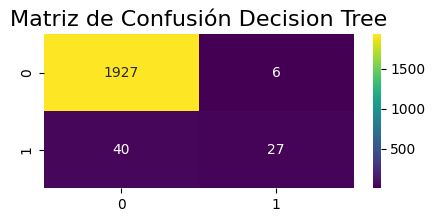

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

plt.figure(figsize = (5,2))
plt.title("Matriz de Confusión Decision Tree", fontsize=16)
sns.heatmap(confusion_matrix(Y_test, y_pred_dt), annot = True, cmap = 'viridis',fmt = '.0f')

plt.show();

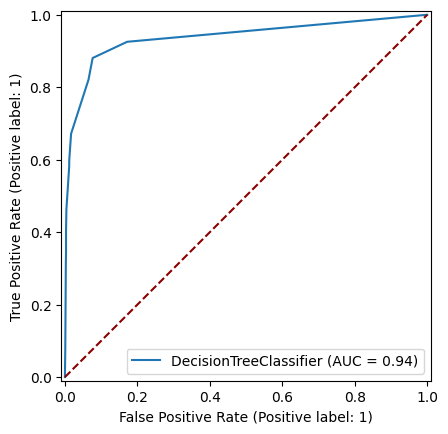

In [ ]:
#Curva ROC
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(dtree , X_test, Y_test )
plt.plot([0,1],[0,1],color='darkred',linestyle='--')
plt.show()

## AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Llamamo al objeto clasificador
adb = AdaBoostClassifier(estimator = None)

# Entrenamos al modelo
adb.fit(X_train,Y_train)

# Hacemos predicciones
y_pred_adb=adb.predict(X_test)

In [ ]:
#Métricas de precisión
clf =print(classification_report(Y_test, y_pred_adb))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1933
           1       0.77      0.30      0.43        67

    accuracy                           0.97      2000
   macro avg       0.87      0.65      0.71      2000
weighted avg       0.97      0.97      0.97      2000



In [ ]:
acc_adb = accuracy_score(Y_test,y_pred_adb)
print(f"Accuracy Score de AdaBoost es :{acc_adb}")

Accuracy Score de AdaBoost es :0.9735


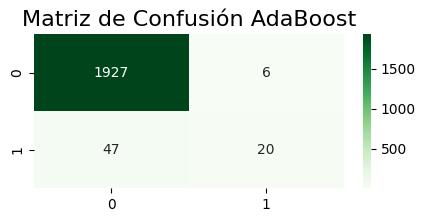

In [ ]:
#Matriz de confusión
from sklearn.metrics import confusion_matrix, classification_report

plt.figure(figsize = (5,2))
plt.title("Matriz de Confusión AdaBoost", fontsize=16)
sns.heatmap(confusion_matrix(Y_test, y_pred_adb), annot = True, cmap ='Greens',fmt = '.0f')

plt.show();

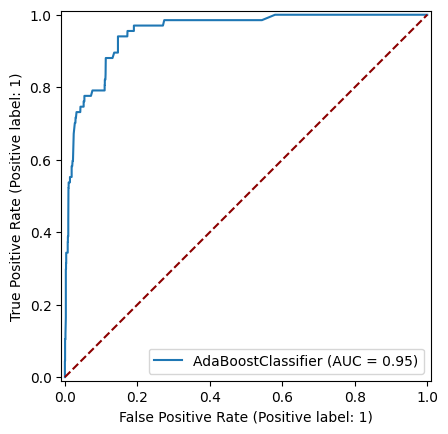

In [ ]:
#Curva ROC
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(adb , X_test, Y_test )
plt.plot([0,1],[0,1],color='darkred',linestyle='--')
plt.show()

## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Llamamos al clasificador
gbc=GradientBoostingClassifier()

# Entrenamos al modelo
gbc.fit(X_train,Y_train)

# Hacemos predicciones
y_pred_gbc=gbc.predict(X_test)

In [ ]:
#Resultados
clf =print(classification_report(Y_test, y_pred_gbc))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1933
           1       0.76      0.46      0.57        67

    accuracy                           0.98      2000
   macro avg       0.87      0.73      0.78      2000
weighted avg       0.97      0.98      0.97      2000



In [ ]:
acc_gbc = accuracy_score(Y_test,y_pred_gbc)
print(f"Accuracy Score de GradientBoosting es :{acc_gbc}")

Accuracy Score de GradientBoosting es :0.977


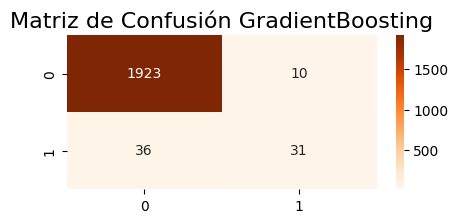

In [ ]:
#Matriz de Confusión
from sklearn.metrics import confusion_matrix, classification_report

plt.figure(figsize = (5,2))
plt.title("Matriz de Confusión GradientBoosting", fontsize=16)
sns.heatmap(confusion_matrix(Y_test, y_pred_gbc), annot = True, cmap ='Oranges',fmt = '.0f')

plt.show();

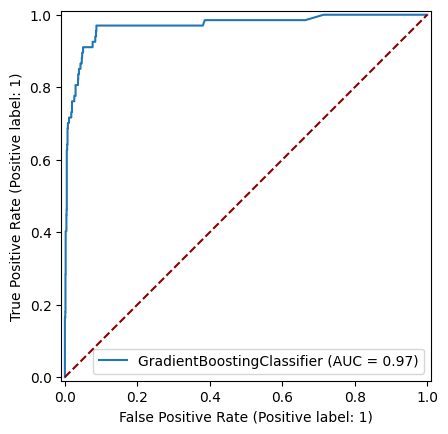

In [ ]:
#Cruva ROC
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(gbc , X_test, Y_test )
plt.plot([0,1],[0,1],color='darkred',linestyle='--')
plt.show()

## XGBoost

In [ ]:
from xgboost import XGBClassifier

# Llamamos al clasificar
xgb =XGBClassifier(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

# Entrenamos al Modelo
xgb.fit(X_train, Y_train)

# Haciendo predicciones
y_pred_xgb=xgb.predict(X_test)

In [ ]:
#Resultado
clf =print(classification_report(Y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1933
           1       0.00      0.00      0.00        67

    accuracy                           0.97      2000
   macro avg       0.48      0.50      0.49      2000
weighted avg       0.93      0.97      0.95      2000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#Accuracy
acc_xgb = accuracy_score(Y_test,y_pred_xgb)
print(f"Accuracy Score de XGB es :{acc_xgb}")

Accuracy Score de XGB es :0.9665


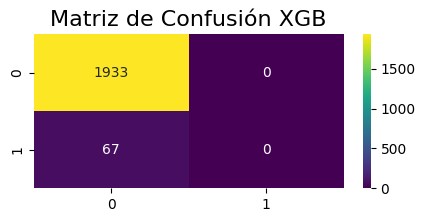

In [ ]:
#Matriz de confusión
from sklearn.metrics import confusion_matrix, classification_report

plt.figure(figsize = (5,2))
plt.title("Matriz de Confusión XGB", fontsize=16)
sns.heatmap(confusion_matrix(Y_test, y_pred_xgb), annot = True, cmap = 'viridis',fmt = '.0f')

plt.show();

# ExtraTrees

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Llamamos la objeto clasificador
etc = ExtraTreesClassifier(n_estimators=100, random_state=0)

# Entrenamos al modelo
etc.fit(X_train,Y_train)

# Haciendo predicciones
y_pred_ex=etc.predict(X_test)

In [ ]:
#Resultados
clf =print(classification_report(Y_test, y_pred_ex))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1933
           1       0.92      0.33      0.48        67

    accuracy                           0.98      2000
   macro avg       0.95      0.66      0.74      2000
weighted avg       0.98      0.98      0.97      2000



In [ ]:
#Accuracy
acc_etc = accuracy_score(Y_test,y_pred_ex)
print(f"Accuracy Score de Extra Trees es :{acc_etc}")

Accuracy Score de Extra Trees es :0.9765


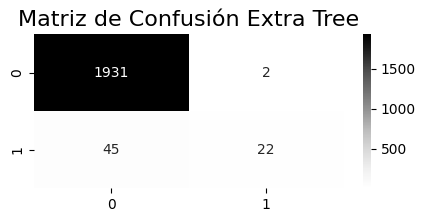

In [ ]:
#Matriz de confusión
from sklearn.metrics import confusion_matrix, classification_report

plt.figure(figsize = (5,2))
plt.title("Matriz de Confusión Extra Tree", fontsize=16)
sns.heatmap(confusion_matrix(Y_test, y_pred_ex), annot = True, cmap ='Greys',fmt = '.0f')

plt.show();

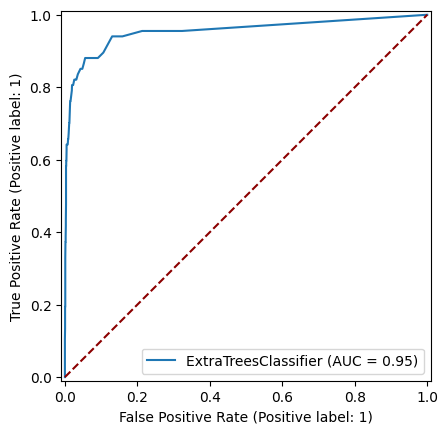

In [ ]:
#Curva ROC
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(etc , X_test, Y_test )
plt.plot([0,1],[0,1],color='darkred',linestyle='--')
plt.show()

# Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree

# Llamamos al objeto clasificador
bag = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))

# Entrenamos al modelo
bag.fit(X_train, Y_train)

# Hacemos predicciones
y_pred_bag=bag.predict(X_test)

In [ ]:
#Resultados
baggin =print(classification_report(Y_test, y_pred_bag))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1933
           1       0.85      0.51      0.64        67

    accuracy                           0.98      2000
   macro avg       0.92      0.75      0.81      2000
weighted avg       0.98      0.98      0.98      2000



In [ ]:
#Accuracy
acc_bag = accuracy_score(Y_test,y_pred_bag)
print(f"Accuracy Score de Bagging es :{acc_etc}")

Accuracy Score de Bagging es :0.9765


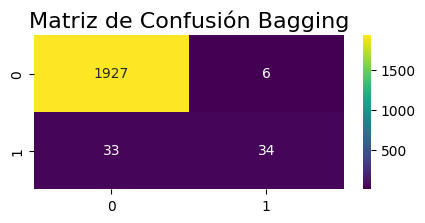

In [ ]:
#Matriz de confusión
from sklearn.metrics import confusion_matrix, classification_report

plt.figure(figsize = (5,2))
plt.title("Matriz de Confusión Bagging", fontsize=16)
sns.heatmap(confusion_matrix(Y_test, y_pred_bag), annot = True, cmap = 'viridis',fmt = '.0f')

plt.show();

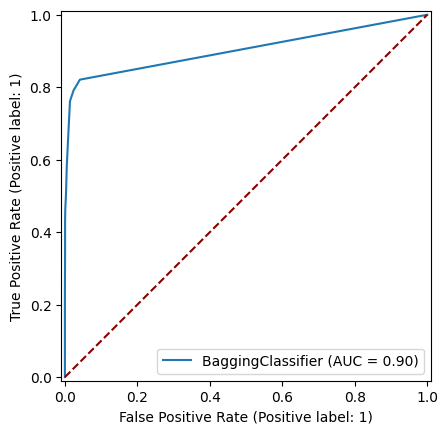

In [ ]:
#Curva ROC
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(bag , X_test, Y_test )
plt.plot([0,1],[0,1],color='darkred',linestyle='--')
plt.show()

# Resultados finales

In [ ]:
#Ranking de Accuracy
models = pd.DataFrame({
    'Model': ['Regresión logistica','Decision Tree',"Support Vector",'Random Forest',"AdaBoost",
              'Gradient Boosting','XGB',"Extra tree","Bagging"],
              'Accuracy': [acc_reg,  acc_dt,acc_svm, acc_rfc, acc_adb, acc_gbc, acc_xgb,
             acc_etc, acc_bag ]})
models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
3,Random Forest,0.9805
8,Bagging,0.9805
1,Decision Tree,0.9770
5,Gradient Boosting,0.9770
7,Extra tree,0.9765
4,AdaBoost,0.9735
2,Support Vector,0.9675
0,Regresión logistica,0.9670
6,XGB,0.9665


In [ ]:
#Visualizando el mejor modelo
import plotly.express as px
fig = px.bar (models, x="Model",
                   y="Accuracy",
                       template = "plotly_dark",
                   color_discrete_sequence=['lime', 'blue'],
                   title='Accuracy de los Modelos')
fig.update_layout(bargap=0.6)
fig.show()

## Ejemplo simple de arbol de decisión

In [ ]:
#Veamos el siguiente ejemplo

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
# Crear datos ficticios
data = { 'edad': [25, 45, 35, 50, 23, 40, 53, 55, 29, 30],
        'ingreso': [50000, 80000, 60000, 120000, 45000, 68000, 70000, 130000, 55000, 62000],
         'crédito': [650, 610, 600, 720, 580, 690, 660, 710, 640, 630],
         'target': [0, 1, 0, 1, 0, 1, 0, 1, 0, 0] # 0: No aprueba, 1: Aprueba
         }
df = pd.DataFrame(data)

In [ ]:
df

,edad,ingreso,crédito,target
0,25,50000,650,0
1,45,80000,610,1
2,35,60000,600,0
3,50,120000,720,1
4,23,45000,580,0
5,40,68000,690,1
6,53,70000,660,0
7,55,130000,710,1
8,29,55000,640,0
9,30,62000,630,0


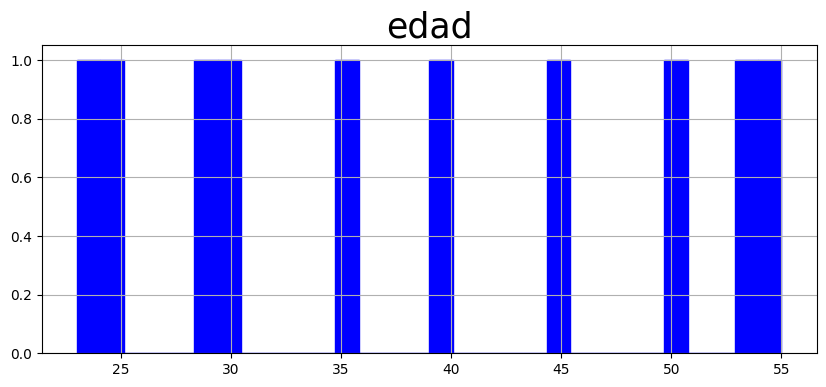

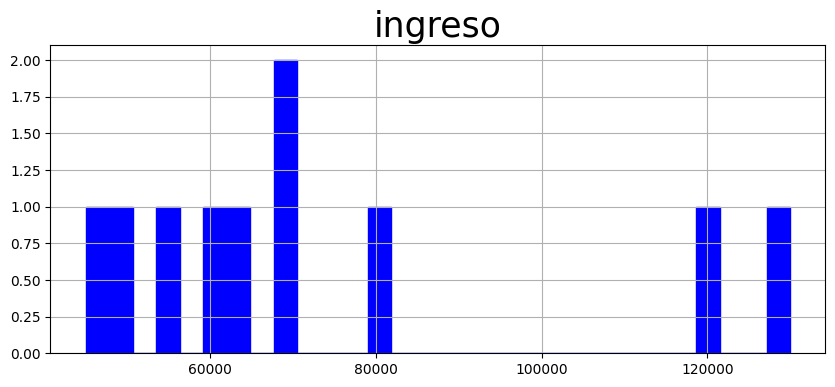

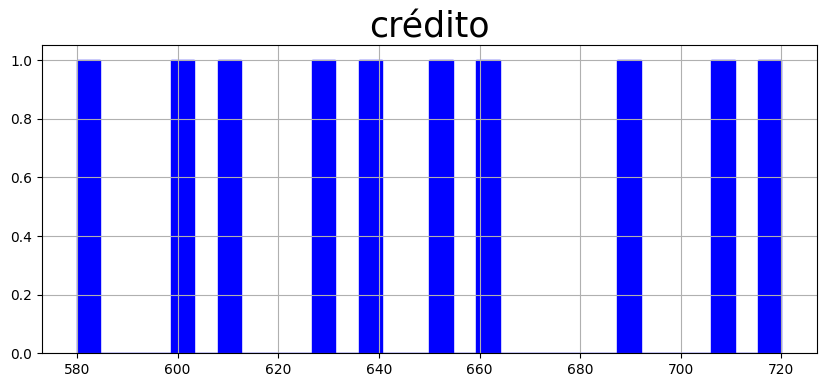

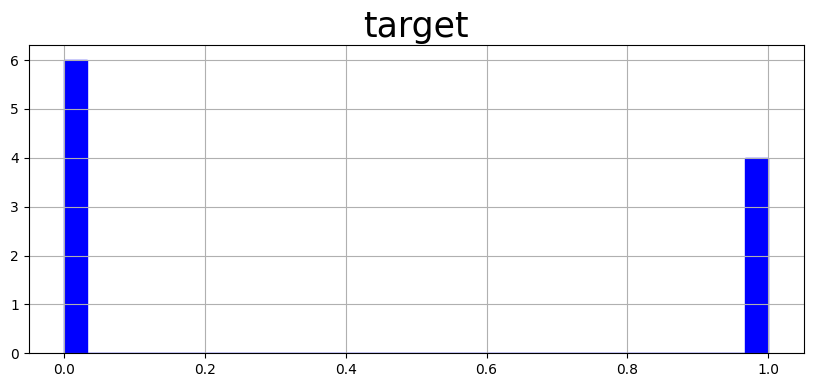

In [ ]:
# Esta función va plotear un histograma
def desc_num_feature(feature_name):
  fig, ax = plt.subplots(figsize=(10,4))
  df[feature_name].hist(bins=30,  color='blue', edgecolor="b")
  ax.set_title(feature_name, size=25)

for x in df.columns:
  desc_num_feature(x)

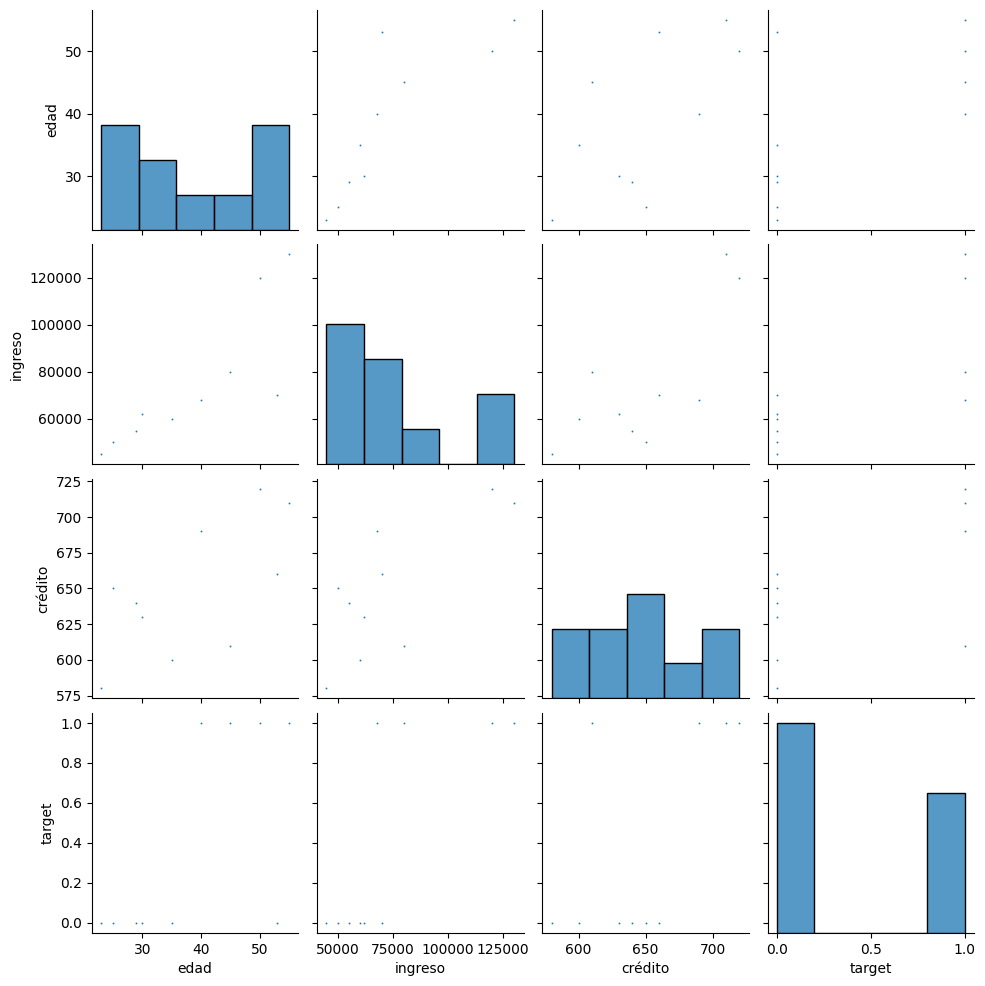

In [ ]:
import seaborn as sns

sns.pairplot(df[df.columns], plot_kws={"s": 2})

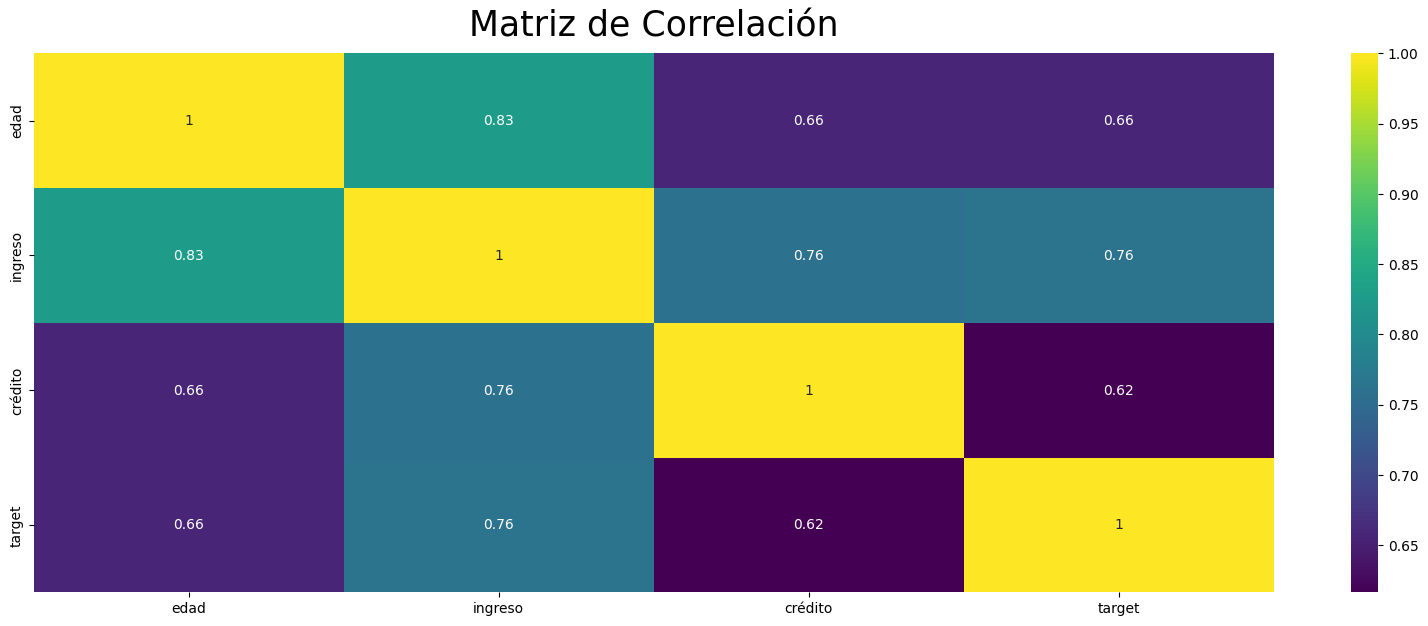

In [ ]:
# Matriz de correlación
plt.figure(figsize=(20, 7))
heatmap = sns.heatmap(df[df.columns].corr(),cmap='viridis',annot=True)

heatmap.set_title('Matriz de Correlación', fontdict={'fontsize':25}, pad=12);

In [ ]:
import plotly.express as px
fig = px.scatter_3d(df, x= 'edad', y='ingreso', z='crédito', color="target")
fig.show()

In [ ]:
# Separar las características y el target
X = df[['edad', 'ingreso', 'crédito']]
y = df['target']
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = DecisionTreeClassifier(criterion='gini', random_state=42)
model.fit(X_train, y_train)
# Hacer predicciones
y_pred = model.predict(X_test)
# Evaluar el modelo
accuracy = model.score(X_test, y_test)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.50


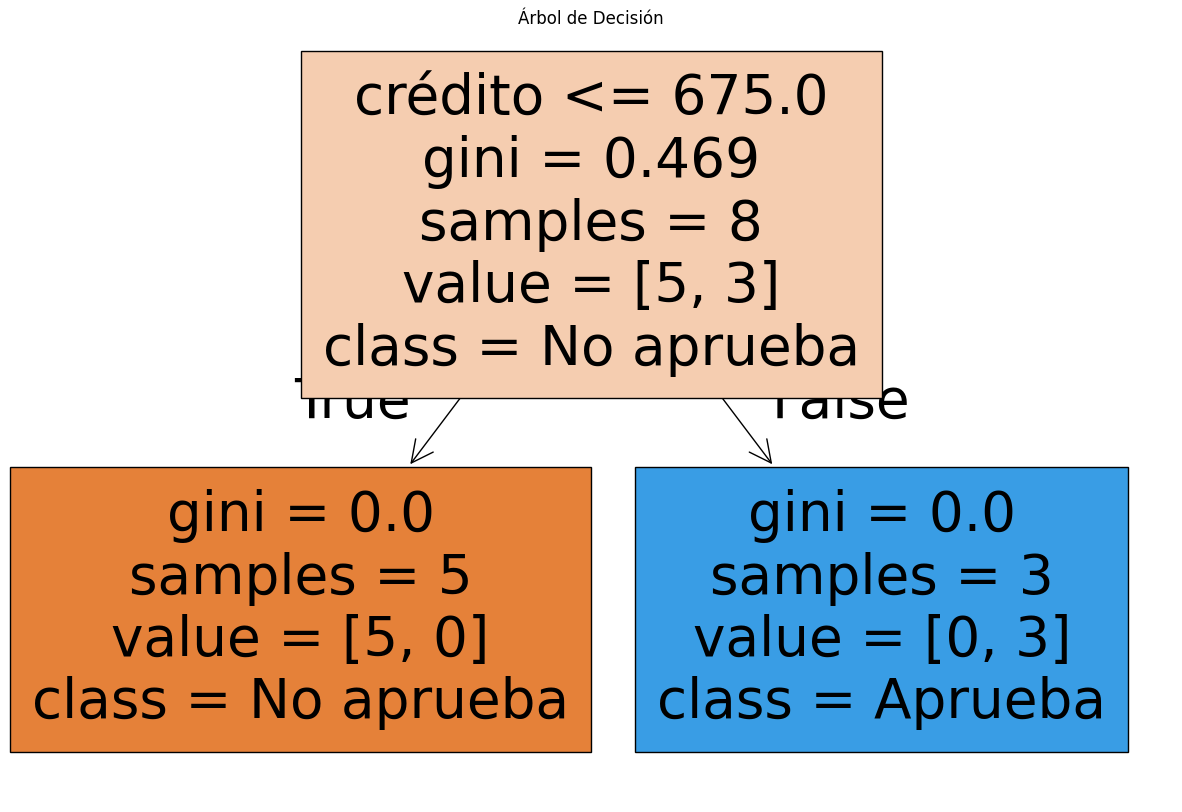

In [ ]:
# Visualizar el árbol de decisión
plt.figure(figsize=(15,10))
plot_tree(model, feature_names=['edad', 'ingreso', 'crédito'], class_names=['No aprueba', 'Aprueba'], filled=True)
plt.title("Árbol de Decisión")
plt.show()

In [ ]:
from sklearn.tree import export_text

# Extraer las reglas del árbol
tree_rules = export_text(model, feature_names=['edad', 'ingreso', 'crédito'])
print(tree_rules)


|--- crédito <= 675.00
|   |--- class: 0
|--- crédito >  675.00
|   |--- class: 1



#DATA & ANALYTICS





Web: www.datayanalytics.com